In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
import funciones_complementarias as fc
import lightgbm as lgb  


warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')


#### Función para encontrar información del dataset

In [78]:
def mostrar_información(df, column):
    print("------------------------------------")
    print("Type:")
    print(type(df[column][0]))
    print("------------------------------------")
    print("Describe:")
    print(df[column].describe())
    print("------------------------------------")
    print("Unique:")
    print(df[column].value_counts())
    print("------------------------------------")
    print("Random values:")
    sample_values = df[column].sample(n=15)
    print(sample_values)
    print("------------------------------------")
    filtered_data = df_train.dropna(subset=[column])
    print("Anova:")
    groups = filtered_data.groupby(column)['SalePrice'].apply(list)
    F, p = stats.f_oneway(*groups)
    print(f"F-statistic: {F}, p-value: {p}")

### Información variables categóricas y numéricas discretas

------------------------------------
Type:
<class 'str'>
------------------------------------
Describe:
count     1460
unique       4
top         TA
freq       906
Name: ExterQual, dtype: object
------------------------------------
Unique:
ExterQual
TA    906
Gd    488
Ex     52
Fa     14
Name: count, dtype: int64
------------------------------------
Random values:
155     TA
307     TA
527     Ex
579     TA
944     TA
498     TA
568     Gd
325     TA
1093    TA
216     Gd
187     TA
699     Gd
96      Gd
127     TA
1064    TA
Name: ExterQual, dtype: object
------------------------------------
Anova:
F-statistic: 443.3348314150462, p-value: 1.4395510967787893e-204


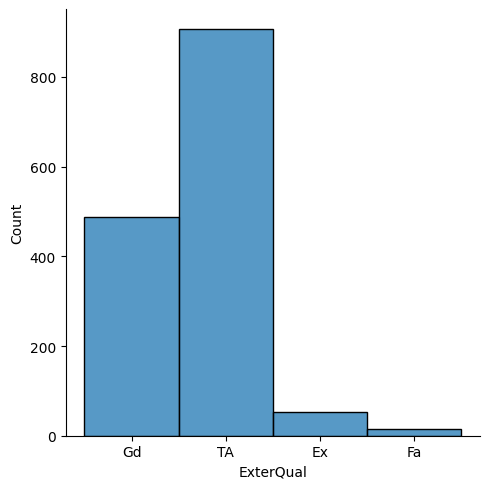

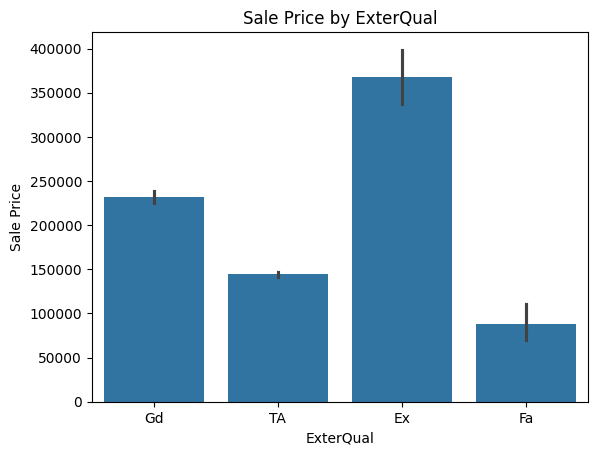

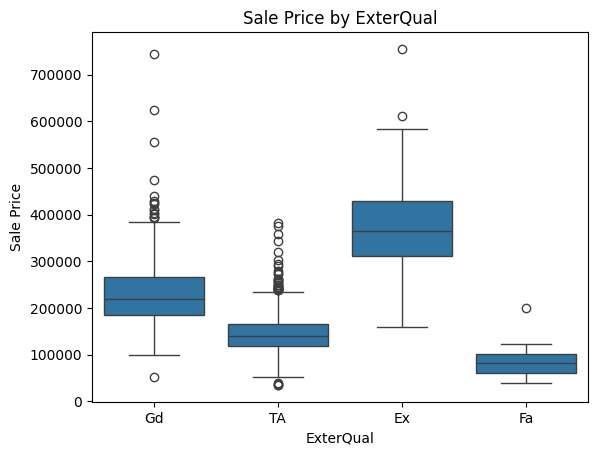

In [79]:
varaible = 'ExterQual'
x_ = df_train[varaible]
y_ = df_train['SalePrice']
mostrar_información(df_train, varaible)
#distribución de la variable x graficamente:
sns.displot(x_)
plt.show()
sns.barplot(x=x_, y=y_)
plt.xlabel(x_.name)
plt.ylabel('Sale Price')
plt.title('Sale Price by ' + x_.name)
plt.show()
sns.boxplot(x=x_, y=y_)
plt.xlabel(x_.name)
plt.ylabel('Sale Price')
plt.title('Sale Price by ' + x_.name)
plt.show()


### Información variables Numéricas

------------------------------------
Type:
<class 'numpy.float64'>
------------------------------------
Describe:
count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64
------------------------------------
Unique:
MasVnrArea
0.0      861
180.0      8
108.0      8
72.0       8
16.0       7
        ... 
567.0      1
337.0      1
51.0       1
234.0      1
63.0       1
Name: count, Length: 327, dtype: int64
------------------------------------
Random values:
617       0.0
909       0.0
1251    163.0
1453      0.0
1304    117.0
403     650.0
653       0.0
399     100.0
478     336.0
16      180.0
978       0.0
36        0.0
686       0.0
793     140.0
1321      0.0
Name: MasVnrArea, dtype: float64
------------------------------------
Anova:
F-statistic: 3.5107442852433155, p-value: 2.0158815982450965e-54


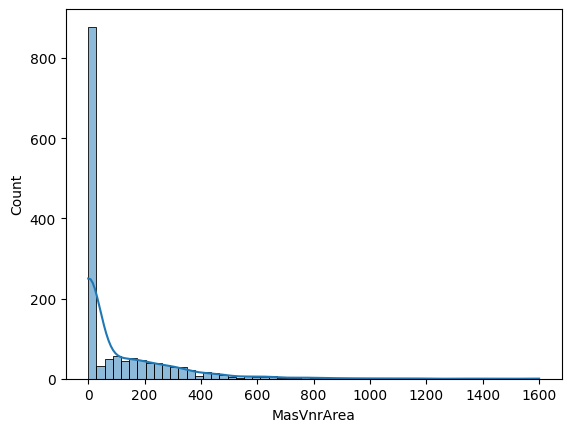

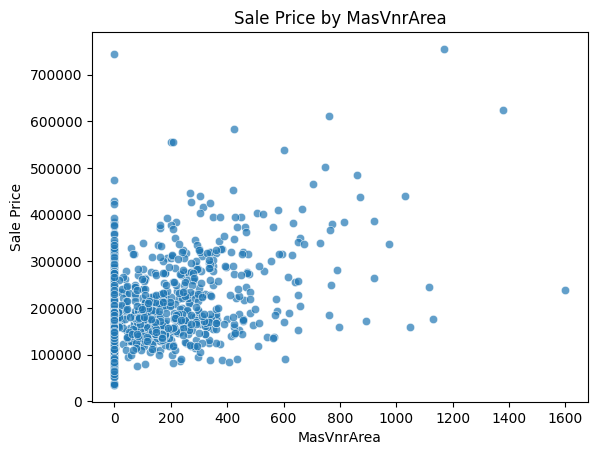

In [6]:
varaible = 'MasVnrArea'
x_ = df_train[varaible]
y_ = df_train['SalePrice']
mostrar_información(df_train, varaible)
#distribución de la variable x graficamente:
sns.histplot(x_,kde=True,legend=True)
plt.show()
#scater plot con lineas de regresión

sns.scatterplot(x=x_, y=y_,alpha=0.7)
plt.xlabel(x_.name)
plt.ylabel('Sale Price')
plt.title('Sale Price by ' + x_.name)
plt.show()


##### Habiendo revisado la distribución de todas las variables y su relación, saco como conclusión que  menor P-Value, mayor relevancia tienen en la variable objetivo; a contiuación saco un csv con P-Value, para comparar mis intuiciones con lo que indica el P-Value

### Tratamiento de variables

In [70]:
df_pre = df_train
df_pre

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


### Estudio de la variable SalePrice

#### Revisión P-Value de todas las variables para confirmar análisis (ANOVA)

In [4]:
def anova(df, column):
    filtered_data = df.dropna(subset=[column])
    groups = filtered_data.groupby(column)['SalePrice'].apply(list)
    if len(groups) < 2:
        return None  # O puedes usar un valor por defecto como 1 para los p_values no calculables
    F, p = stats.f_oneway(*groups)
    return p

In [5]:
df_anova = pd.DataFrame()
df_anova['variable'] = df_pre.columns
df_anova['p_value'] = df_anova['variable'].apply(lambda x: anova(df_pre, x))
df_anova = df_anova.sort_values('p_value')
#Add a column with the significance level
alpha = 0.05
df_anova['significant'] = df_anova['p_value'].apply(lambda x: 'Yes' if x < alpha else 'No')
#Add a column with the mean of SalePrice
df_anova['mean'] = df_anova['variable'].apply(lambda x: df_pre.groupby(x)['SalePrice'].mean().std())
#Add a clumn with the order of the variable
df_anova['order'] = range(1, len(df_anova) + 1)
#export the data to csv
df_anova.to_csv('anova.csv', index=False)
df_anova.head(10)

,variable,p_value,significant,mean,order
17,OverallQual,0.000000e+00,Yes,133581.054206,1
80,SalePrice,0.000000e+00,Yes,99639.724589,2
12,Neighborhood,1.558600e-225,Yes,66725.196972,3
61,GarageCars,1.121129e-211,Yes,79829.273233,4
27,ExterQual,1.439551e-204,Yes,121669.389152,5
53,KitchenQual,3.032213e-192,Yes,98569.621328,6
30,BsmtQual,9.610615e-186,Yes,94368.336203,7
62,GarageArea,1.070514e-158,Yes,92365.899289,8
49,FullBath,3.802188e-129,Yes,94101.921238,9
19,YearBuilt,9.128104e-107,Yes,55775.657497,10


#### A continuación una representación de las variables con más significado:

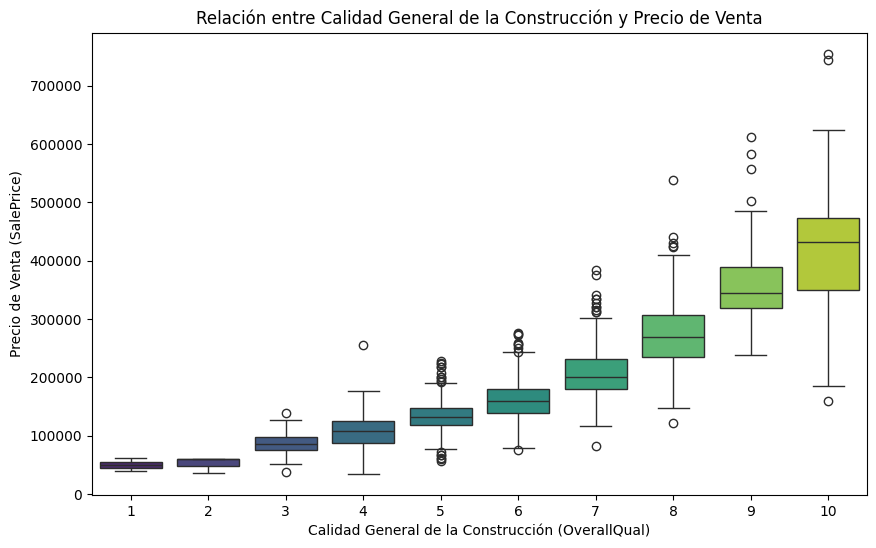

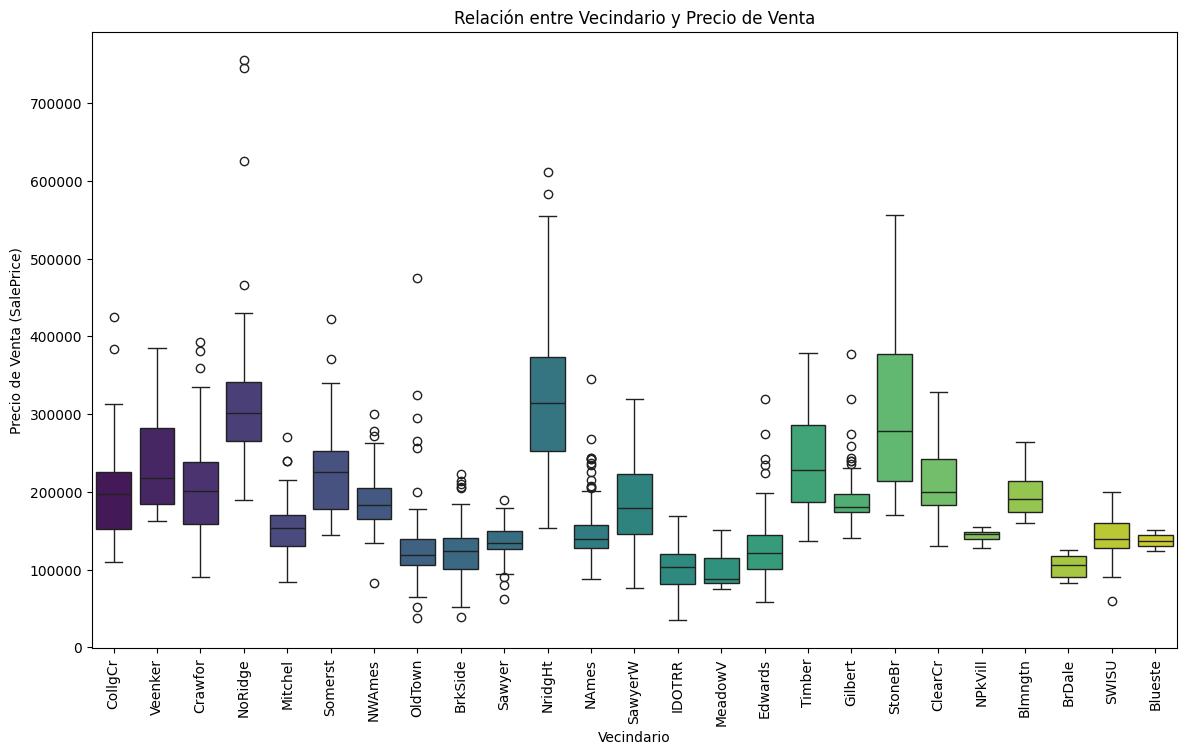

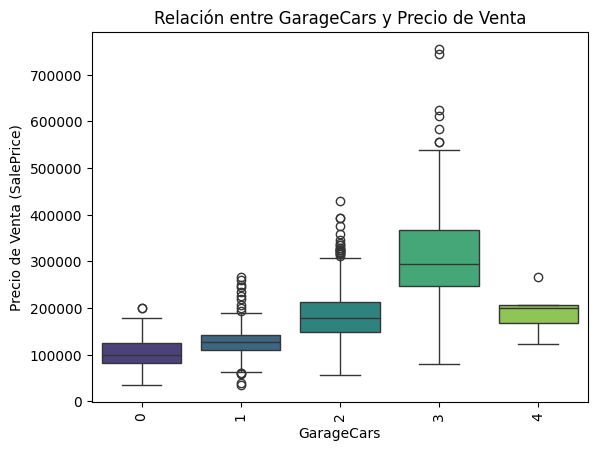

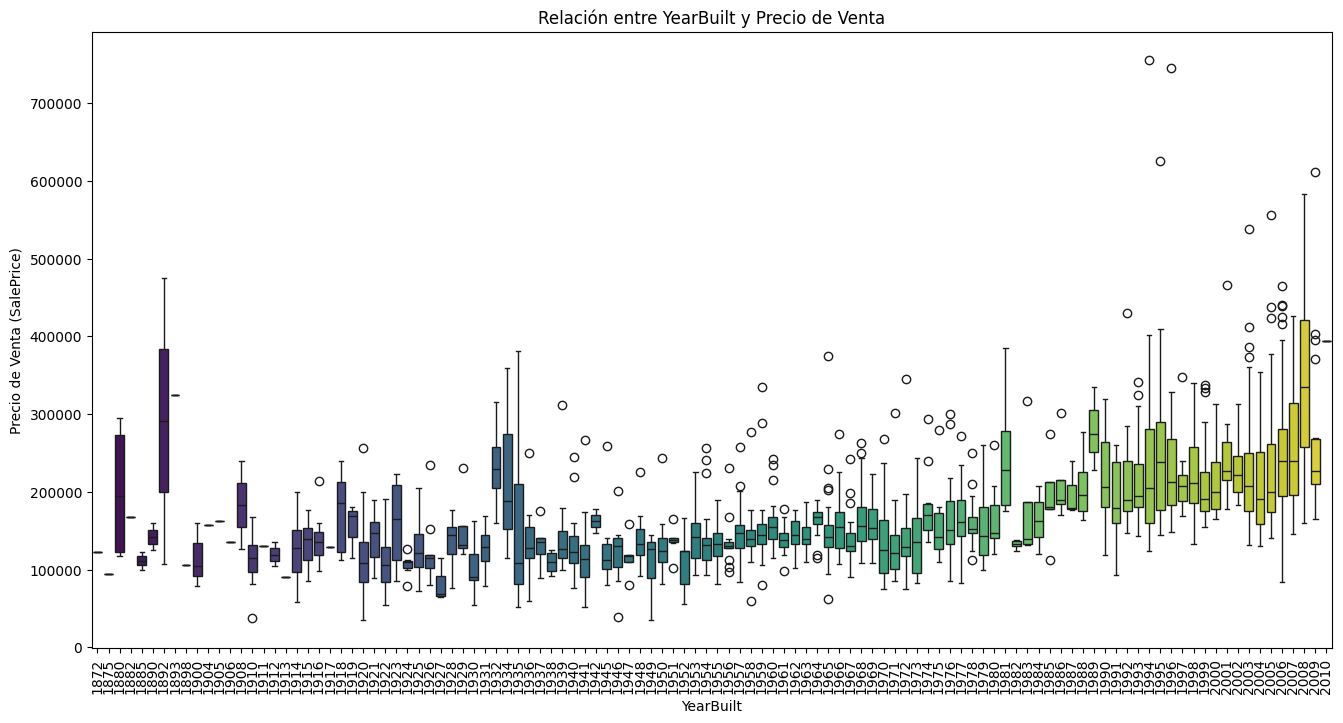

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_pre['OverallQual'], y=df_pre['SalePrice'], palette='viridis')
plt.xlabel('Calidad General de la Construcción (OverallQual)')
plt.ylabel('Precio de Venta (SalePrice)')
plt.title('Relación entre Calidad General de la Construcción y Precio de Venta')
plt.show()
plt.figure(figsize=(14, 8))
sns.boxplot(x='Neighborhood', y='SalePrice', data=df_pre, palette='viridis')
plt.xlabel('Vecindario')
plt.ylabel('Precio de Venta (SalePrice)')
plt.title('Relación entre Vecindario y Precio de Venta')
plt.xticks(rotation=90)  # Rotar etiquetas para mejor legibilidad
plt.show()
sns.boxplot(x='GarageCars', y='SalePrice', data=df_pre, palette='viridis')
plt.xlabel('GarageCars')
plt.ylabel('Precio de Venta (SalePrice)')
plt.title('Relación entre GarageCars y Precio de Venta')
plt.xticks(rotation=90)  # Rotar etiquetas para mejor legibilidad
plt.show()

plt.figure(figsize=(16, 8))
sns.boxplot(x='YearBuilt', y='SalePrice', data=df_pre, palette='viridis')
plt.xlabel('YearBuilt')
plt.ylabel('Precio de Venta (SalePrice)')
plt.title('Relación entre YearBuilt y Precio de Venta')
plt.xticks(rotation=90)  # Rotar etiquetas para mejor legibilidad
plt.show()

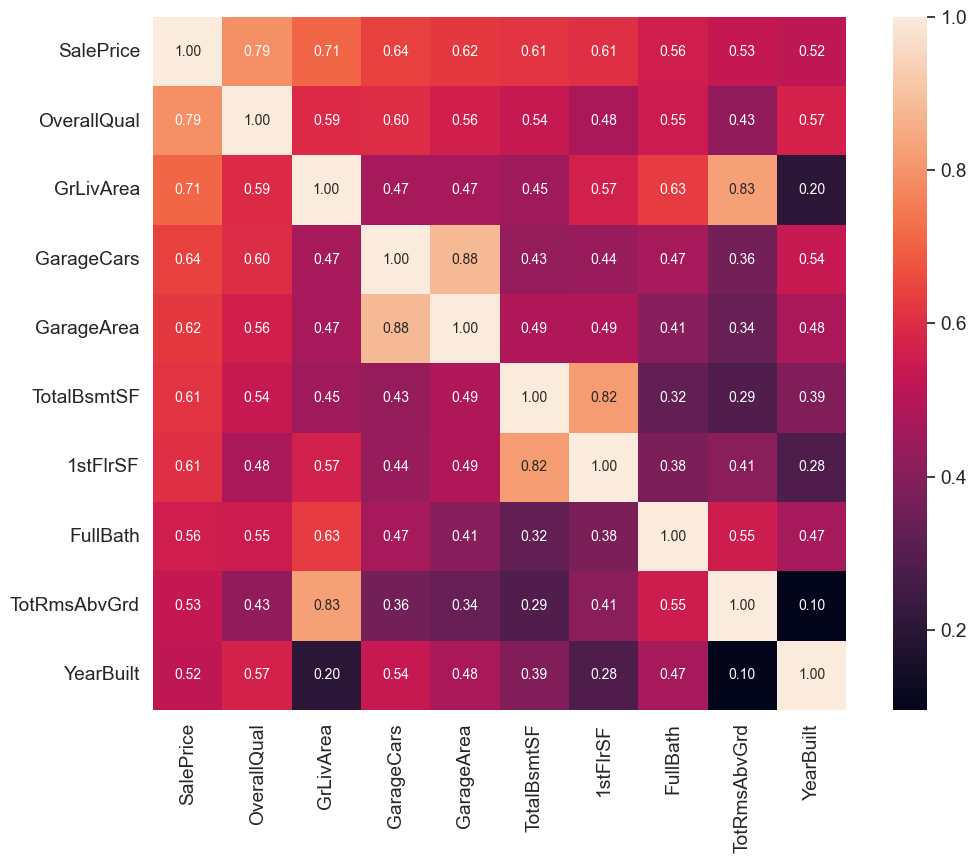

In [25]:
#correlation matrix with only numeric variables and the most correlated variables with SalePrice
corrmat = df_pre.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(12, 9))
k = 10  # number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_pre[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values,
                 xticklabels=cols.values)
plt.show()

#### Viendo estas variables y entrando en más detalle sobre ellas:

* Nos podemos quedar solo con GarageCars, por la correlación con GarageArea
* Nos podemos quedar solo con TotalBsmtSF, por la correlación con 1stFloor
* Nos podemos quedar solo con FrLivArea, por la correlación con TotRmsAbvGrd


In [117]:
#Eliminamos las variables que no aportan información
df_train = df_pre.drop(['GarageArea', '1stFlrSF', 'TotRmsAbvGrd'], axis=1)

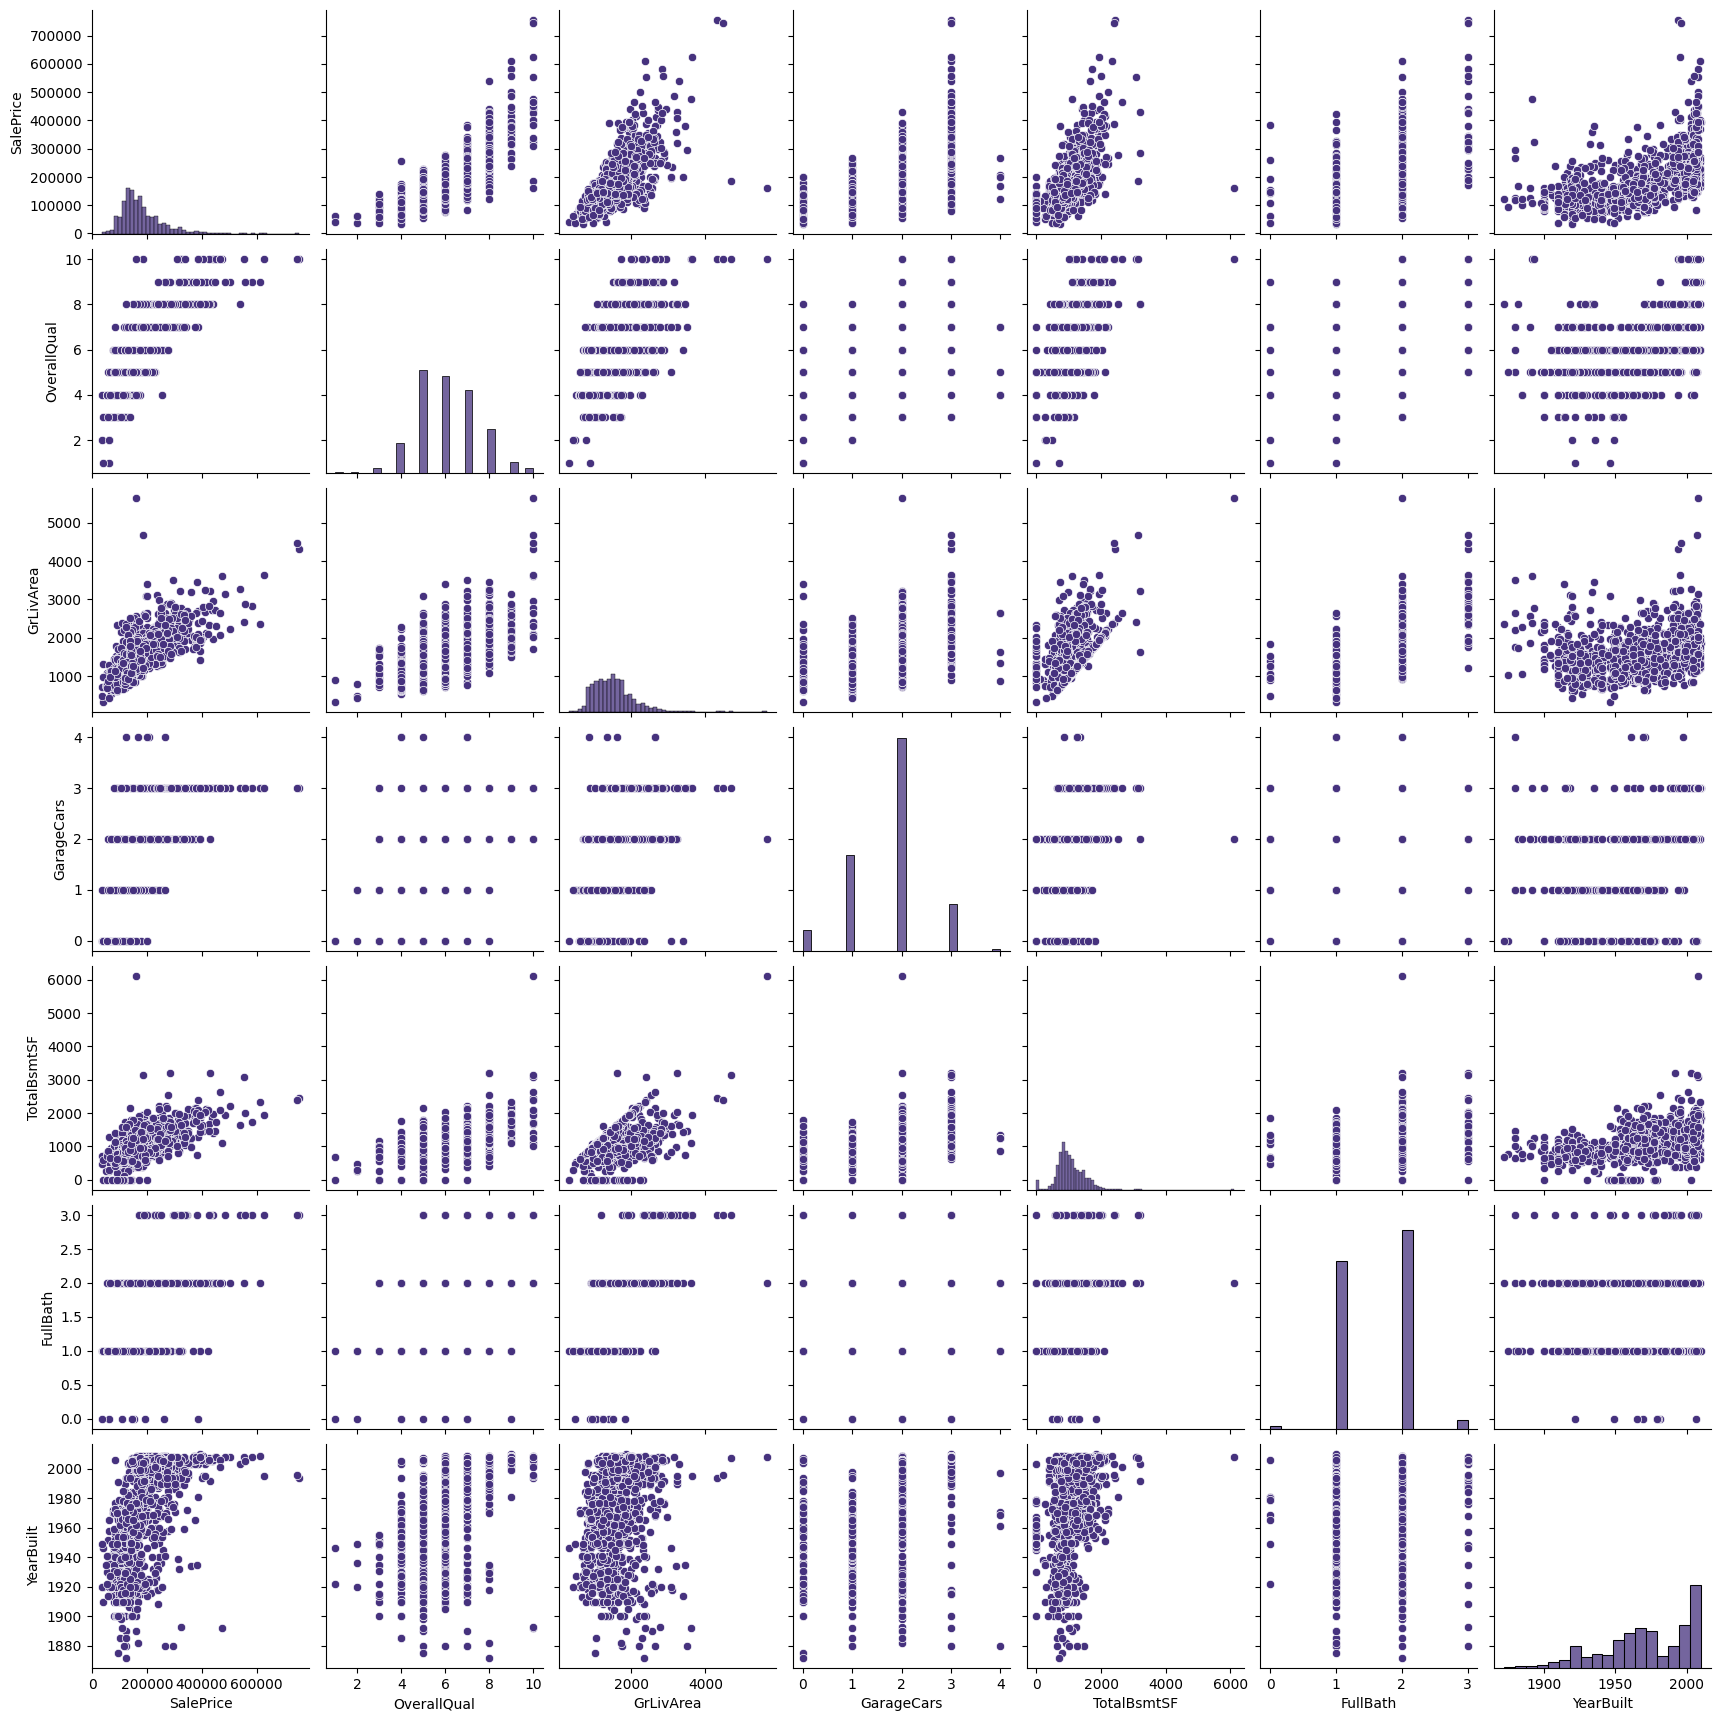

In [118]:
#scatterplot
sns.set_palette('viridis')
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show()

### Gestión de los Valores Nulos

In [119]:
df_train.shape

(1460, 78)

In [120]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)


,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
MasVnrType,872,0.597260
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageQual,81,0.055479
GarageFinish,81,0.055479


##### Procedo a eliminar las variables que tengan más de un 50% de sus valores nulos

In [121]:
missing_data_columns = np.array(missing_data[missing_data['Total'] > 1].index)

In [122]:
#drop columns from df_train which are in missing_data and have more than 1 missing value
df_train = df_train.drop(missing_data_columns, axis=1)
#drop rows from df_train which have missing values
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isnull().sum().max()

0

In [123]:
fc.missing_values_table(df_train)

Su selección tiene 60 columnas.
Hay 0 columnas que tienen valores perdidos.


,Valores perdidos,% del total


### Veificación y tratado de Outliers

#### Normalización de las variable

In [124]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'].values[:,np.newaxis])
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


#### Estudio bivariado de nuevo

##### GrLivArea

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

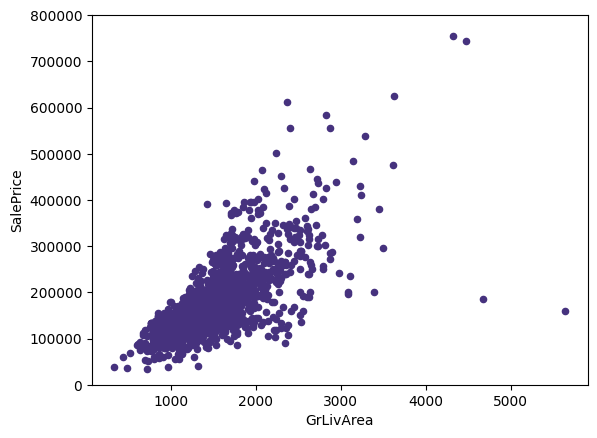

In [125]:
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

###### Conociendo mejor el dataSet se puede determinar que hay valores no representativos que seguramente sean de un terreno de agricultura

In [126]:
## Eliminamos los valores atípicos
df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]
df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)

#### Normalización de SalePrice

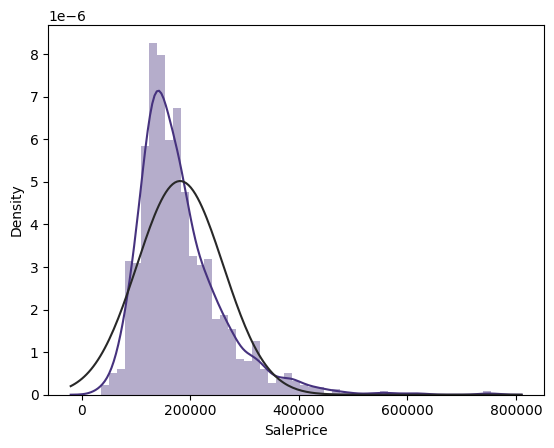

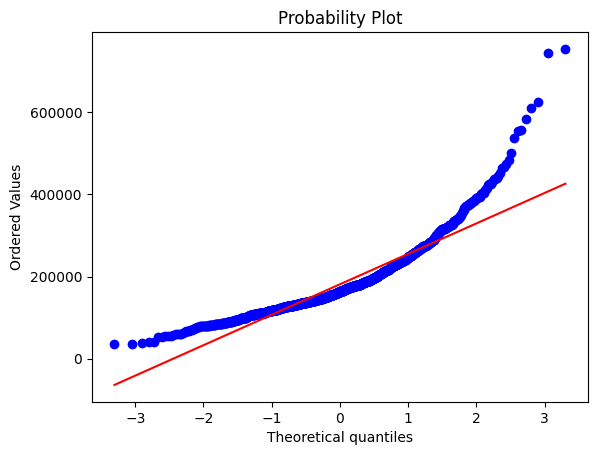

In [127]:
#histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm)
fig = plt.figure()
#probplot permite comparar la distribución de una variable con una distribución normal
res = stats.probplot(df_train['SalePrice'], plot=plt)

In [128]:
#applying log transformation
df_train['SalePrice'] = np.log(df_train['SalePrice'])

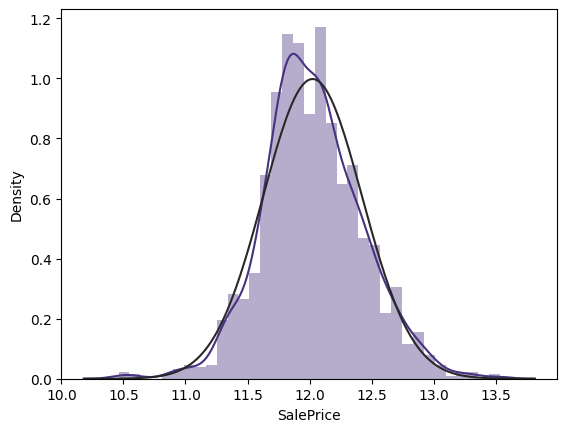

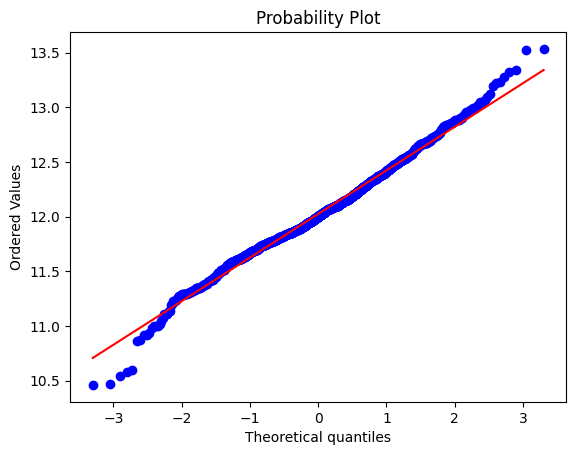

In [192]:
#transformed histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

#### GrLivArea

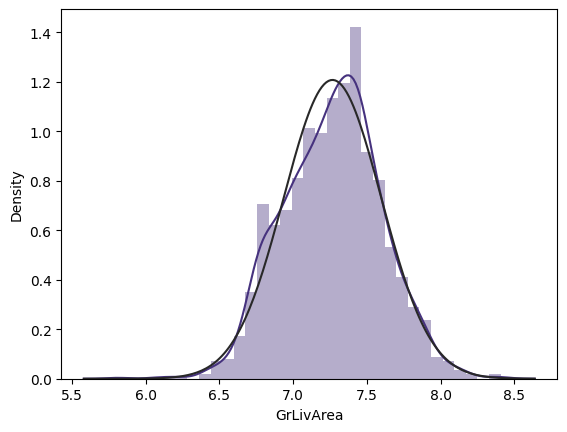

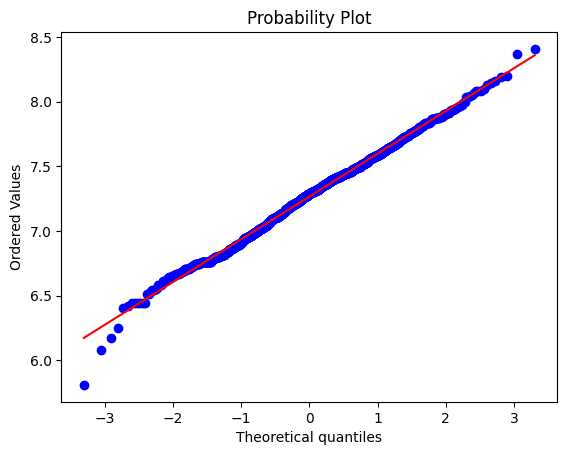

In [193]:
#histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

In [131]:
#data transformation
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])

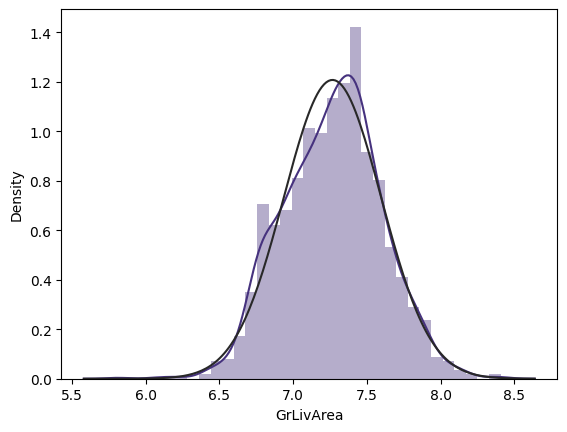

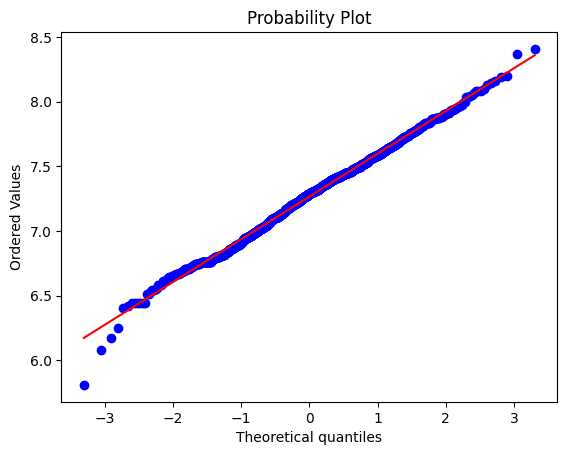

In [133]:
#transformed histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

#### TotalBsmtSF

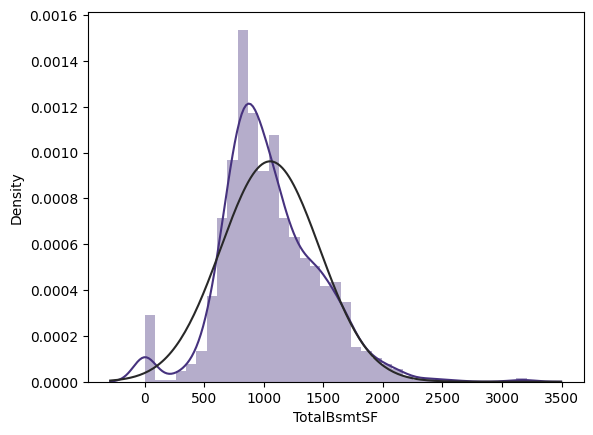

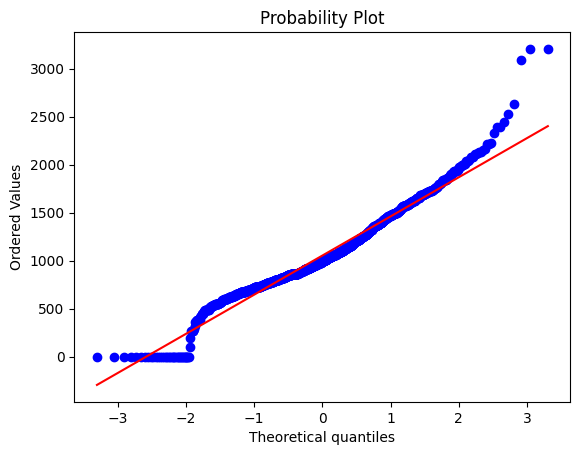

In [134]:
#histogram and normal probability plot
sns.distplot(df_train['TotalBsmtSF'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)

In [135]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index=df_train.index)
df_train['HasBsmt'] = 0 
df_train.loc[df_train['TotalBsmtSF']>0,'HasBsmt'] = 1

In [136]:
#transform data
df_train.loc[df_train['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

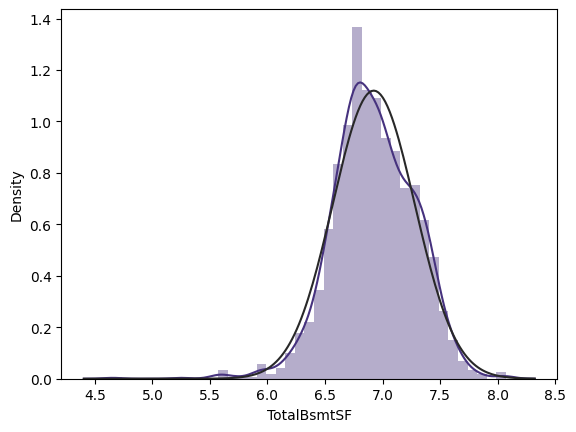

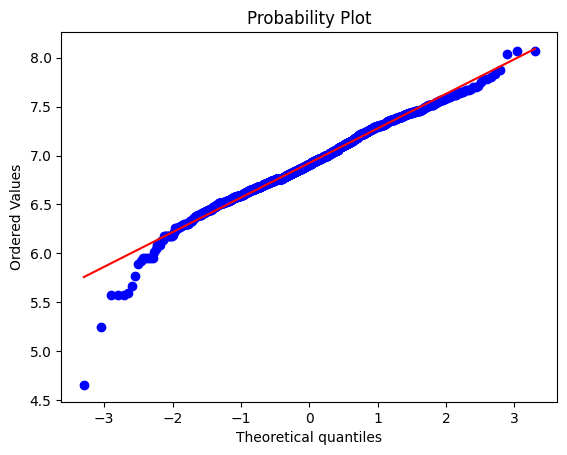

In [137]:
#histogram and normal probability plot
sns.distplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

#### Nomalización del resto de variables

##### Codificación de variables categóricas

In [138]:
categorical_cols = df_train.select_dtypes(include=['object']).columns
categorical_cols

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [139]:
nominal_cols = ['MSZoning', 'Street', 'LotShape', 'LandContour','Condition1','Condition2',
    'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1','Heating',
    'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st','Utilities','RoofMatl',
    'Exterior2nd', 'Foundation', 'CentralAir','Exterior2nd','LotConfig',
    'Electrical', 'Functional','PavedDrive', 'SaleType', 'SaleCondition']
ordinal_cols = ['ExterQual', 'ExterCond','HeatingQC', 'KitchenQual']

In [140]:
np.setdiff1d(np.setdiff1d(categorical_cols,nominal_cols),ordinal_cols)

array([], dtype=object)

In [141]:
np.setdiff1d(nominal_cols,np.setdiff1d(categorical_cols,ordinal_cols))

array([], dtype='<U13')

In [142]:
from sklearn.preprocessing import LabelEncoder

# Crear un diccionario para la codificación ordinal
ordinal_mappings = {
    'ExterQual': {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'ExterCond': {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'HeatingQC': {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'KitchenQual': {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
}

# Aplicar la codificación ordinal
for col, mapping in ordinal_mappings.items():
    df_train[col] = df_train[col].map(mapping)
df_train
# Aplicar One-Hot Encoding a las variables nominales
df_train = pd.get_dummies(df_train, columns=nominal_cols, drop_first=True, dtype=int)

# Verificar el resultado
print(df_train.head())
df_train.shape


   Id  MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0   1          60     8450            7            5       2003          2003   
1   2          20     9600            6            8       1976          1976   
2   3          60    11250            7            5       2001          2002   
3   4          70     9550            7            5       1915          1970   
4   5          60    14260            8            5       2000          2000   

   ExterQual  ExterCond  BsmtFinSF1  ...  SaleType_ConLI  SaleType_ConLw  \
0          4          3         706  ...               0               0   
1          3          3         978  ...               0               0   
2          4          3         486  ...               0               0   
3          3          3         216  ...               0               0   
4          4          3         655  ...               0               0   

   SaleType_New  SaleType_Oth  SaleType_WD  SaleConditio

(1457, 208)

#

In [156]:
# Verificar valores perdidos después de la imputación
fc.missing_values_table(df_train)

Su selección tiene 208 columnas.
Hay 0 columnas que tienen valores perdidos.


,Valores perdidos,% del total


In [194]:
#normalizar los datos de df_train menos los que ya están normalizados
scaler = StandardScaler()
df_train_scaled = pd.DataFrame(scaler.fit_transform(df_train), columns=df_train.columns)
df_train_scaled['SalePrice'] = df_train['SalePrice']
df_train_scaled['GrLivArea'] = df_train['GrLivArea']
df_train_scaled['TotalBsmtSF'] = df_train['TotalBsmtSF']



In [201]:
df_train_scaled.isnull().sum().max()
#Show values of the row with missing values
df_train_scaled[df_train_scaled.isnull().any(axis=1)]
df_train_scaled.dropna(subset=['SalePrice'], inplace=True)
#Eliminar ID
df_train_scaled.drop('Id', axis=1, inplace=True)


In [196]:
type(df_train_scaled)

pandas.core.frame.DataFrame

## Separación de Datos de Entrenamiento y Test

In [202]:
from sklearn.model_selection import train_test_split

X = df_train_scaled.drop(['SalePrice'], axis=1)
y = df_train_scaled['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [211]:
#HAcer cross validation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error


In [212]:

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Entrenar un modelo de regresión lineal
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

#cambiar formato de y_pred_lr a DataFrame
y_pred_lr = pd.DataFrame(y_pred_lr, columns=['SalePrice'])
y_pred_lr['SalePrice'] = y_pred_lr['SalePrice'].astype(float)
print(y_pred_lr)
#create dataframe with the difference between the real and predicted values
df_diff = pd.concat([y_test.reset_index(drop=True), y_pred_lr], axis=1, keys=['SalePrice', 'SalePricePred'])
df_diff['diff'] = df_diff['SalePrice'] - df_diff['SalePricePred']
print(df_diff.describe())

# Cross-validation para Linear Regression
lr_scores = cross_val_score(lr, X, y, cv=5, scoring='neg_mean_squared_error')
lr_rmse_scores = np.sqrt(-lr_scores)

print("Linear Regression RMSE scores:", lr_rmse_scores)
print("Linear Regression RMSE mean:", lr_rmse_scores.mean())
print("Linear Regression RMSE std deviation:", lr_rmse_scores.std())

# Entrenar un modelo de Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Cross-validation para Random Forest
rf_scores = cross_val_score(rf, X, y, cv=5, scoring='neg_mean_squared_error')
rf_rmse_scores = np.sqrt(-rf_scores)

print("Random Forest RMSE scores:", rf_rmse_scores)
print("Random Forest RMSE mean:", rf_rmse_scores.mean())
print("Random Forest RMSE std deviation:", rf_rmse_scores.std())


     SalePrice
0    12.159518
1    11.624198
2    11.923142
3    12.503737
4    11.769160
..         ...
286  11.653129
287  12.764740
288  12.025272
289  11.857697
290  12.015823

[291 rows x 1 columns]
        SalePrice SalePricePred          diff
        SalePrice     SalePrice              
count  291.000000  2.910000e+02  2.910000e+02
mean    12.033020  3.570983e+05 -3.570863e+05
std      0.420903  4.238588e+06  4.238588e+06
min     10.542706  1.027798e+01 -5.120992e+07
25%     11.767568  1.183995e+01 -1.586152e-01
50%     12.004568  1.207239e+01 -1.372437e-04
75%     12.293870  1.229132e+01  1.502537e-01
max     13.521139  5.120993e+07  9.251263e-01
Linear Regression RMSE scores: [1.79235080e+12 9.43041490e+11 1.58570740e+09 9.09558321e+09
 1.95697799e+10]
Linear Regression RMSE mean: 553128672865.569
Linear Regression RMSE std deviation: 717294950900.6539
Random Forest RMSE scores: [0.20901161 0.20616024 0.23938458 0.23203574 0.24081722]
Random Forest RMSE mean: 0.22548187874808

In [61]:
print(y)

0       0.347273
1       0.007288
2       0.536154
3      -0.515281
4       0.869843
          ...   
1455   -0.074560
1456    0.366161
1457    1.077611
1458   -0.488523
1459   -0.420841
Name: SalePrice, Length: 1460, dtype: float64


### XGBoost (no funciona en mac)

In [80]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Definir los parámetros del modelo XGBoost
params = {
    'objective': 'reg:squarederror',  # Tarea de regresión
    'eval_metric': 'rmse',            # Métrica de evaluación
    'eta': 0.1,                       # Tasa de aprendizaje
    'max_depth': 6                    # Profundidad máxima del árbol
}

# Entrenar el modelo
evallist = [(dtest, 'eval'), (dtrain, 'train')]
num_round = 100
bst = xgb.train(params, dtrain, num_round, evals=evallist, early_stopping_rounds=10)

# Realizar predicciones
log_predictions = bst.predict(dtest)
y_pred_xgb = np.exp(log_predictions)  # Deshacer la transformación logarítmica

# Evaluación del modelo
mse_xgb = mean_squared_error(np.exp(y_test), y_pred_xgb)  # Deshacer la transformación en y_test
r2_xgb = r2_score(np.exp(y_test), y_pred_xgb)             # Deshacer la transformación en y_test

print(f"XGBoost MSE: {mse_xgb}")
print(f"XGBoost R²: {r2_xgb}")

ModuleNotFoundError: No module named 'xgboost'

### Carga de datos de test

In [187]:

# Cargar el conjunto de datos de prueba
df_test = pd.read_csv('test.csv')

df_test.shape

(1459, 80)

### Gestión de valores nulos en test

In [188]:
missing_values_test = fc.missing_values_table(df_test)
missing_values_test

Su selección tiene 80 columnas.
Hay 33 columnas que tienen valores perdidos.


,Valores perdidos,% del total
PoolQC,1456,99.8
MiscFeature,1408,96.5
Alley,1352,92.7
Fence,1169,80.1
MasVnrType,894,61.3
FireplaceQu,730,50.0
LotFrontage,227,15.6
GarageQual,78,5.3
GarageCond,78,5.3
GarageYrBlt,78,5.3


In [65]:
### Tratamiento de variables
df_pre = df_train
df_pre

Su selección tiene 70 columnas.
Hay 27 columnas que tienen valores perdidos.


Index(['BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs',
       'BldgType_TwnhsE', 'CentralAir_Y', 'Condition1_Feedr',
       'Condition1_Norm', 'Condition1_PosA', 'Condition1_PosN',
       'Condition1_RRAe',
       ...
       'SalePrice', 'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD',
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'Street_Pave'],
      dtype='object', length=134)

In [66]:
#Imputar los valores perdidos de la variable Frireplace con 'No Fireplace'
df_test_sin_nulos['FireplaceQu'] = df_test_sin_nulos['FireplaceQu'].fillna('No Fireplace')
# Imputar los valores perdidos de las variables categóricas con la moda (el valor más frecuente)
categorical_cols = df_test_sin_nulos.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df_test_sin_nulos[col] = df_test_sin_nulos[col].fillna(df_test_sin_nulos[col].mode()[0])

# Imputar los valores perdidos de las variables numéricas con la mediana
numeric_cols = df_test_sin_nulos.select_dtypes(include=['number']).columns
for col in numeric_cols:
    df_test_sin_nulos[col] = df_test_sin_nulos[col].fillna(df_test_sin_nulos[col].median())

# Verificar valores perdidos después de la imputación
fc.missing_values_table(df_test_sin_nulos)

df_test_sin_nulos.shape

Su selección tiene 70 columnas.
Hay 0 columnas que tienen valores perdidos.


(1459, 70)

### Codificación de variables categóricas en test

In [67]:
# Aplicar la codificación ordinal
for col, mapping in ordinal_mappings.items():
    df_test_sin_nulos[col] = df_test_sin_nulos[col].map(mapping)

# Aplicar One-Hot Encoding a las variables nominales
df_test_sin_nulos = pd.get_dummies(df_test_sin_nulos, columns=nominal_cols, drop_first=True, dtype=int)

#Añadir columnas faltantes
missing_cols = set(df_sin_nulos.columns) - set(df_test_sin_nulos.columns)
for col in missing_cols:
    df_test_sin_nulos[col] = 0

# Verificar el resultado
print(df_test_sin_nulos.head())
df_test_sin_nulos.shape
#Qué columnas tiene df_sin_nulos que no tiene df_test_sin_nulos y viceversa
print("1.____",df_sin_nulos.columns.difference(df_test_sin_nulos.columns))
print("2.____",df_test_sin_nulos.columns.difference(df_sin_nulos.columns))

   MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          20         80.0    11622            5            6       1961   
1          20         81.0    14267            6            6       1958   
2          60         74.0    13830            5            5       1997   
3          60         78.0     9978            6            6       1998   
4         120         43.0     5005            8            5       1992   

   YearRemodAdd  MasVnrArea  ExterQual  ExterCond  ...  SaleCondition_Family  \
0          1961         0.0          3          3  ...                     0   
1          1958       108.0          3          3  ...                     0   
2          1998         0.0          3          3  ...                     0   
3          1998        20.0          3          3  ...                     0   
4          1992         0.0          4          3  ...                     0   

   SaleCondition_Normal  SaleCondition_Partial  LogSalePrice  

### Normalización de variable

In [68]:
numeric_features = df_test_sin_nulos.select_dtypes(include=['float64', 'int64']).columns
df_test_sin_nulos[numeric_features] = scaler.fit_transform(df_test_sin_nulos[numeric_features])


In [69]:
#Comprobar si hay valores que no sean numericos
non_numeric = df_test_sin_nulos.select_dtypes(include=['object']).columns
non_numeric

Index([], dtype='object')

In [70]:
# Verificar valores perdidos después de la imputación
fc.missing_values_table(df_test_sin_nulos)

Su selección tiene 182 columnas.
Hay 0 columnas que tienen valores perdidos.


,Valores perdidos,% del total


### Validación test set

In [71]:
print("1.____",df_sin_nulos.columns.difference(df_test_sin_nulos.columns))
print("2.____",df_test_sin_nulos.columns.difference(df_sin_nulos.columns))



1.____ Index([], dtype='object')
2.____ Index([], dtype='object')


In [72]:
#Quitar columna SalePrice
df_sin_nulos = df_sin_nulos.drop('SalePrice', axis=1)
#hacer que las columnas de df_test_sin_nulos tengan el mismo orden que las de df_sin_nulos
df_test_sin_nulos = df_test_sin_nulos[df_sin_nulos.columns]

### Resultados

In [74]:
# Realizar predicciones con el modelo rf y guardarlas en un archivo CSV
predictions = rf.predict(df_test_sin_nulos)
predictions = np.exp(predictions)*755000  # Deshacer la transformación logarítmica



df_submission = pd.DataFrame({'Id': df_test['Id'], 'SalePrice': predictions})
df_submission.to_csv('submission_rf.csv', index=False)
